In [110]:
#Predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [111]:
#Check for missing values
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [112]:
#Drop the records with missing values as the dataset is large
df.dropna(inplace = True)

In [113]:
#Drop the irrelevant columns
y = df["overall_rating"]
df.drop(["id", "overall_rating", "player_fifa_api_id", "player_api_id", "date"], axis = 1, inplace = True)
df = pd.get_dummies(df, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])

(array([7.0000e+00, 6.0000e+00, 2.0000e+01, 6.3000e+01, 9.2000e+01,
        1.3700e+02, 2.7800e+02, 5.1000e+02, 1.2280e+03, 1.7900e+03,
        2.5000e+03, 3.9630e+03, 6.0410e+03, 9.4210e+03, 1.3460e+04,
        1.8012e+04, 2.0027e+04, 2.0550e+04, 1.9134e+04, 1.8569e+04,
        1.5750e+04, 1.1129e+04, 7.4480e+03, 4.8930e+03, 2.8050e+03,
        1.4350e+03, 7.4100e+02, 2.2300e+02, 8.3000e+01, 3.9000e+01]),
 array([33.        , 35.03333333, 37.06666667, 39.1       , 41.13333333,
        43.16666667, 45.2       , 47.23333333, 49.26666667, 51.3       ,
        53.33333333, 55.36666667, 57.4       , 59.43333333, 61.46666667,
        63.5       , 65.53333333, 67.56666667, 69.6       , 71.63333333,
        73.66666667, 75.7       , 77.73333333, 79.76666667, 81.8       ,
        83.83333333, 85.86666667, 87.9       , 89.93333333, 91.96666667,
        94.        ]),
 <a list of 30 Patch objects>)

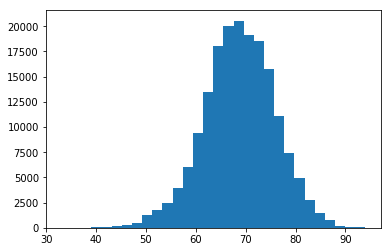

In [114]:
#Plot the distribution for dependent variable and see if it follows normal distribution
plt.hist(y, 30, range= (33,94))

In [92]:
#Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=0)

In [123]:
#Build the model
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
accuracy = lm.score(X_test, y_test)
print("Linear Regression accuracy is: ", accuracy)
print("The predicted ratings are:\n", y_pred)
#Print intercept and coefficients
print("Intercept: ", lm.intercept_)
print("Co-efficient:\n", lm.coef_)

Linear Regression accuracy is:  0.8442305721592156
The predicted ratings are:
 [73.15891209 68.64801922 66.77554048 ... 63.69465509 65.73067626
 72.6473192 ]
Intercept:  -3.420506859402252
Co-efficient:
 [ 0.37589388  0.02359495  0.01315401  0.06839109  0.05166705  0.00284441
 -0.01109537  0.01210758  0.01262331  0.00727113  0.1325138   0.00577206
  0.01066816 -0.0084337   0.20816051  0.00670128  0.01623017  0.01574573
 -0.00345814  0.05927641 -0.01363225  0.02035698  0.01191278 -0.00955593
 -0.0020983   0.01330876  0.03151745  0.00398433 -0.02669702  0.16700042
  0.03460266 -0.0347326   0.05869804  0.02310817 -0.00384337  0.00384337
 -0.1469588   0.12610617 -0.68349246  1.36117673  0.02348092 -0.04966102
 -0.65049922  0.01984768 -0.06869191  0.48823035 -0.52948204  0.42016185
 -0.25489812 -0.38754962  0.09200236  0.63247419  0.48598476  0.32198682
 -0.68349246  0.01984768  0.00814178  0.42640443 -0.26759518 -0.00336465
 -0.04966102 -0.65049922]


2.122192871740098
7.709715754941181
2.776637490732483


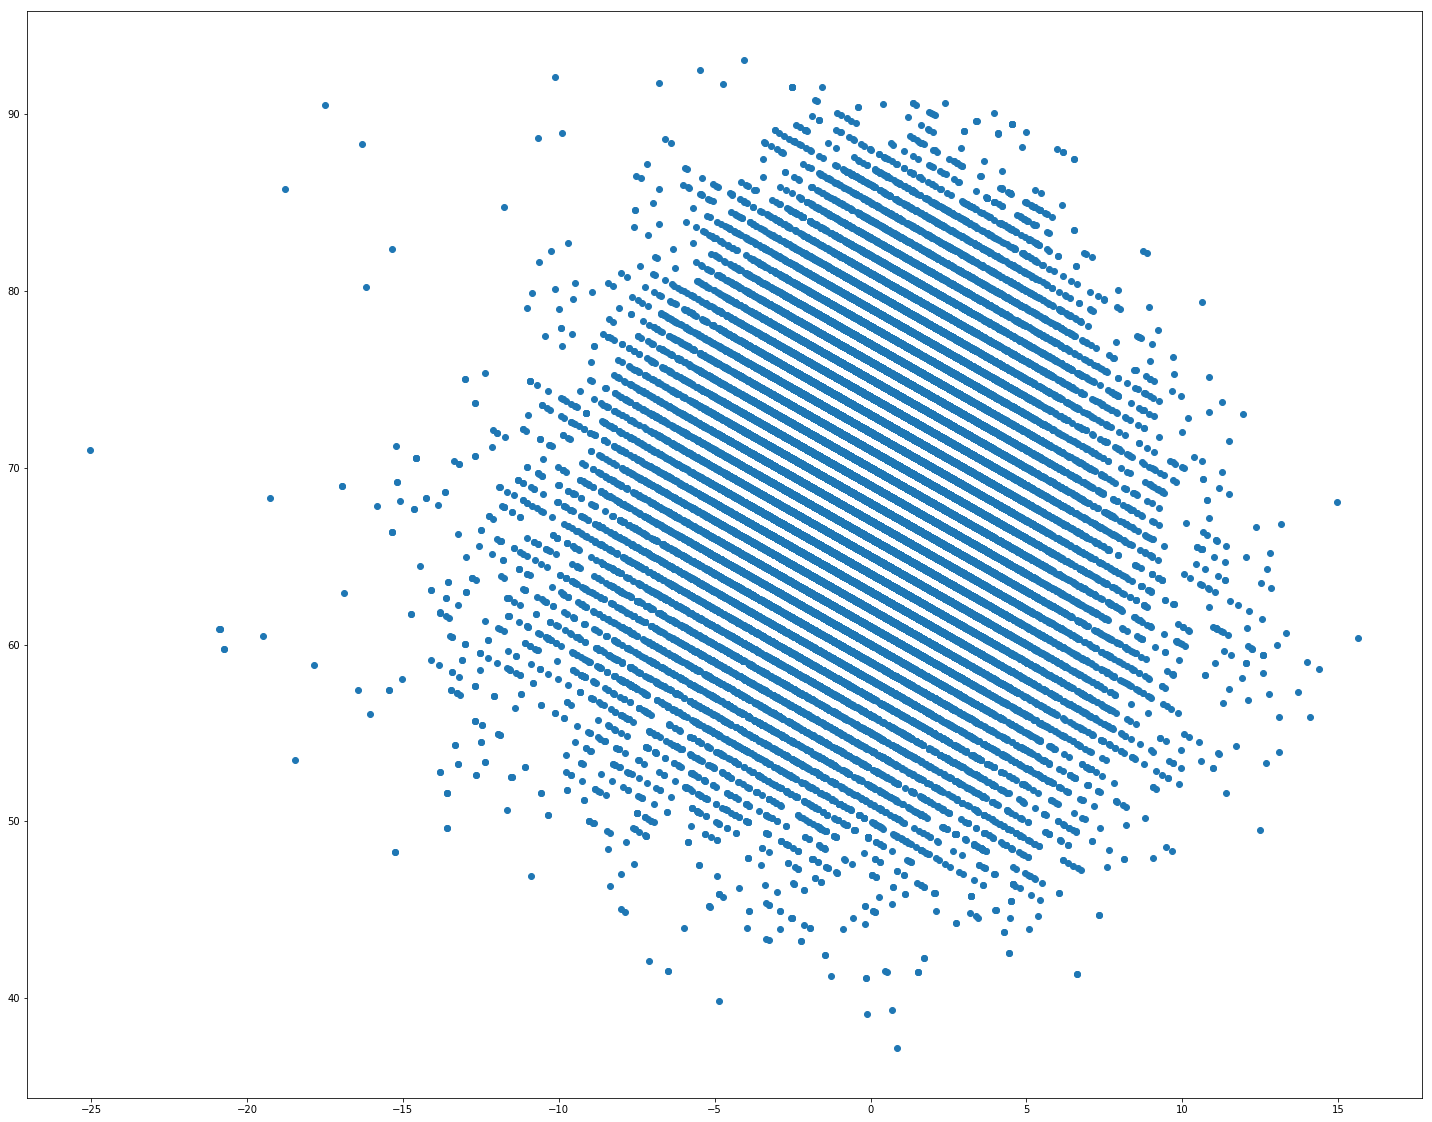

In [118]:
#Validate the assumptions for linear regression
#Assumption1: Linear regression needs the relationship between the independent and dependent variables to be linear
import statsmodels.formula.api as sm
from sklearn import metrics
results = sm.ols(formula='y_train ~ X_train', data=X_train).fit()
Y_pred = results.predict(X_train)
residual = y_train - Y_pred
print(metrics.mean_absolute_error(y_train, Y_pred))
print(metrics.mean_squared_error(y_train, Y_pred))
print(np.sqrt(metrics.mean_squared_error(y_train, Y_pred)))
#Linearity & Equal variance
pred_val = Y_pred.copy()
true_val = y_train.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(25,20))
_ = ax.scatter(residual, pred_val)
#Conclusion: The scatter plot shows negative linear relationship

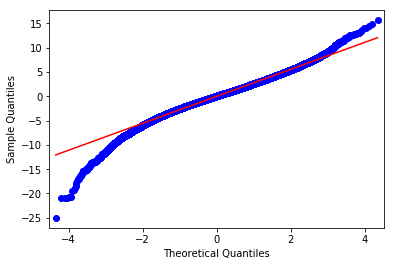

In [119]:
#Assumption 2: The linear regression analysis requires all variables to be multivariate normal (The error terms must be normally distributed)
#QQ Plot
from statsmodels.graphics.gofplots import qqplot

qqplot(residual, line='s')
plt.show()

#Conclusion: The errors are normally distributed

In [121]:
#Assumption 3: Linear regression assumes that there is little or no multicollinearity in the data.  Multicollinearity occurs when the independent variables are too highly correlated with each other.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
print(vif.round(1))
#Conclusion: If the VIF is above 5, multicolinearity is likely to be present and we should consider dropping the variable.

    VIF Factor                    features
0     2.200000                   potential
1     4.900000                    crossing
2     7.200000                   finishing
3     4.200000            heading_accuracy
4     8.900000               short_passing
5     5.300000                     volleys
6    10.000000                   dribbling
7     5.000000                       curve
8     3.800000          free_kick_accuracy
9     4.300000                long_passing
10   13.600000                ball_control
11    7.500000                acceleration
12    6.300000                sprint_speed
13    4.000000                     agility
14    2.300000                   reactions
15    2.400000                     balance
16    4.700000                  shot_power
17    1.500000                     jumping
18    2.700000                     stamina
19    2.400000                    strength
20    6.600000                  long_shots
21    2.900000                  aggression
22    4.800

In [122]:
#Assumption 4: The error terms must have constant variance. This phenomenon is known as homoskedasticity.
test = sms.het_breuschpagan(residual, results.model.exog)
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(*zip(name, test))

#Conclusion: Since p-value is less than .05, so null hypothesis is rejected, i.e. data is not homoskedasticity

('Lagrange multiplier statistic', 14074.270450004795) ('p-value', 0.0) ('f-value', 283.44556833103763) ('f p-value', 0.0)
